# Demo 10: Integration of Vector Fields: The Line Integral and Flux

Demo by Christian Mikkelstrup, Hans Henrik Hermansen, Jakob Lemvig, Karl Johan Måstrup Kristensen, and Magnus Troen

In [1]:
from sympy import *
from dtumathtools import *

init_printing()

## Brief Intro to Vector Fields in Sympy

In general when working with vector fields in Sympy it is often easiest to defined them as lambda/python functions, since we often are about to insert a vector function into $\pmb{V}$.

In [2]:
x, y, z = symbols("x,y,z", real=True)

V = lambda x, y, z: Matrix([y * cos(x), y * sin(x), z])
V(x, y, z)

⎡y⋅cos(x)⎤
⎢        ⎥
⎢y⋅sin(x)⎥
⎢        ⎥
⎣   z    ⎦

If we for instance have an expression of a parameter function

\begin{equation*}
\boldsymbol{r}_t = \begin{bmatrix} r_1(t) \\ r_2(t) \\ r_3(t) \end{bmatrix}
\end{equation*}

then we can easily insert $\boldsymbol{r}_t$ into $V$ by doing:

In [3]:
r1, r2, r3 = symbols("r1,r2,r3", cls=Function)
t = symbols("t")
r = Matrix([r1(t), r2(t), r3(t)])

# r inserted into V
V(*r)

⎡r₂(t)⋅cos(r₁(t))⎤
⎢                ⎥
⎢r₂(t)⋅sin(r₁(t))⎥
⎢                ⎥
⎣     r₃(t)      ⎦

If we want to use $\pmb{V}$, we can analytically simply insert symbolic variables. In later/other courses or in the project period in this course one may get the need for computing vector field properties such as curl and divergence. This is done easily with `dtumathtools`:

In [4]:
rotV = dtutools.rot(V(x, y, z), (x, y, z))
rotV

⎡        0        ⎤
⎢                 ⎥
⎢        0        ⎥
⎢                 ⎥
⎣y⋅cos(x) - cos(x)⎦

In [5]:
divV = dtutools.div(V(x, y, z), (x, y, z))
divV

If one is to carry out sufficiently many analytical computations on $\pmb{V}$, it may though turn out to be more optimal to just define $\pmb{V}$ as a Sympy object instead and then use Sympy's `.subs()` for inserting variables:

In [6]:
V = Matrix([y * cos(x), y * sin(x), z])
V

⎡y⋅cos(x)⎤
⎢        ⎥
⎢y⋅sin(x)⎥
⎢        ⎥
⎣   z    ⎦

## Line Integral of Vector Fields (Tangential Line Integral)

We consider the vector field 
\begin{equation*}
\pmb{V}(x,y,z) = \begin{bmatrix} -y \\ x \\ 2z \end{bmatrix}
\end{equation*}
as well as two curves $K_1$ and $K_2$ with the parametric representations
\begin{equation*}
r_1(u) = \begin{bmatrix} \cos(u) \\ \sin(u) \\ \frac{u}{2} \end{bmatrix}
\end{equation*}
\begin{equation*}
r_2(u) = \begin{bmatrix} 1 \\ 0 \\ \frac{u}{2} \end{bmatrix},
\end{equation*}
where $u \in [0,4\pi]$.

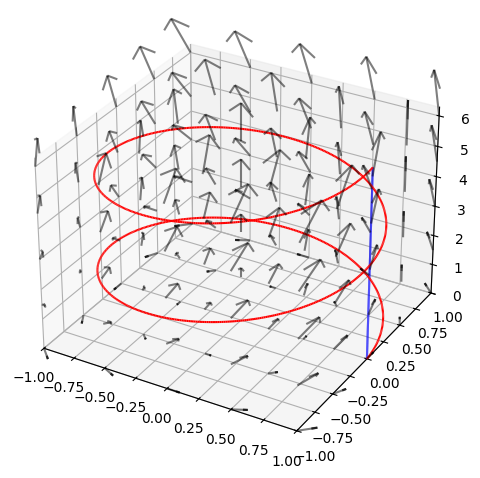

In [7]:
x, y, z, u = symbols("x y z u", real=True)
r1 = Matrix([cos(u), sin(u), u / 2])
r2 = Matrix([1, 0, u / 2])
V = Matrix([-y, x, 2 * z])
u_range = (u, 0, 4 * pi)

K1 = dtuplot.plot3d_parametric_line(
    *r1, u_range, show=False, rendering_kw={"color": "red"}, colorbar=False
)
K2 = dtuplot.plot3d_parametric_line(
    *r2, u_range, show=False, rendering_kw={"color": "blue"}, colorbar=False
)
vectorfield_V = dtuplot.plot_vector(
    V,
    (x, -1, 1),
    (y, -1, 1),
    (z, 0, 6),
    n=5,
    quiver_kw={"alpha": 0.5, "length": 0.1, "color": "black"},
    colorbar=False,
    show=False,
)

combined = K1 + K2 + vectorfield_V
combined.legend = False
combined.show()

We want to compute the tangential line integral of $\pmb{V}$ along each of the two curves from the point $a = (1,0,0)$ to $b = (1,0,2\pi)$. This corresponds for both of them to $u \in [0,4\pi]$.  First, we will find the tangent vectors:

In [8]:
r1d = r1.diff(u)
r2d = r2.diff(u)
r1d, r2d

⎛⎡-sin(u)⎤  ⎡ 0 ⎤⎞
⎜⎢       ⎥  ⎢   ⎥⎟
⎜⎢cos(u) ⎥, ⎢ 0 ⎥⎟
⎜⎢       ⎥  ⎢   ⎥⎟
⎝⎣  1/2  ⎦  ⎣1/2⎦⎠

The functions that are to be integrated are according to the theorem:

In [9]:
integrand1 = V.subs({x: r1[0], y: r1[1], z: r1[2]}).dot(r1d)
integrand2 = V.subs({x: r2[0], y: r2[1], z: r2[2]}).dot(r2d)
integrand1.simplify(), integrand2.simplify()

**The tangential line integral of $f$ along the curve $K_1$ is then**
\begin{equation*}
\int_{K_1} \pmb{V} \cdot \mathrm{d}\pmb{s} = \int_0^{4\pi} \frac{u}{2} + 1 \,\mathrm{d}u
\end{equation*}

In [10]:
integrate(integrand1, (u, 0, 4 * pi))

**The tangential line integral of $f$ along the curve $K_2$ is then**
\begin{equation*}
\int_{K_2} \pmb{V} \cdot \mathrm{d}\pmb{s} = \int_0^{4\pi} \frac{u}{2} \,\mathrm{d}u
\end{equation*}

In [11]:
integrate(integrand2, (u, 0, 4 * pi))

### Perspective:

If we interpret $\pmb{V}$ as a force vector field, then the work (energy) with which $\pmb{V}$ constributes when the particles is moved along the vertical line is $4\pi$ less than if the particle was moved along the spiral curve. The magnitude of the work is hence in this example dependent on the path. $\pmb{V}$ can hence not be a gradient vector field.

## Seaching for Anti-Derivative via Stair Lines. Theory

An anti-derivative to a smooth vector field $\pmb{V}$ can, if an anti-derivative exists, be determined via the tangential line integral of $\pmb{V}$ along an arbitrary curve from the origin $\pmb{x}_0 = (0,0,0)$ to an arbitrary fixed point $\pmb{x} = (x, y, z)$. One achieves the easiest computations by using the stair line from the origin to $P$ as the curve.

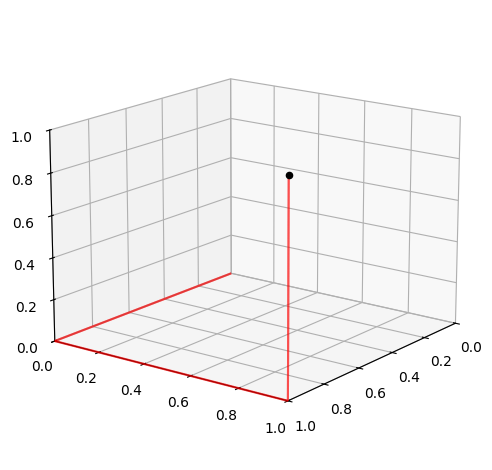

In [12]:
u_range = (u, 0, 1)
r1 = dtuplot.plot3d_parametric_line(
    u, 0, 0, u_range, show=False, rendering_kw={"color": "red"}, colorbar=False
)
r2 = dtuplot.plot3d_parametric_line(
    1, u, 0, u_range, show=False, rendering_kw={"color": "red"}, colorbar=False
)
r3 = dtuplot.plot3d_parametric_line(
    1, 1, u, u_range, show=False, rendering_kw={"color": "red"}, colorbar=False
)
xyz = dtuplot.scatter(Matrix([1, 1, 1]), show=False, rendering_kw={"color": "black"})
combined = r1 + r2 + r3 + xyz
combined.legend = False
combined.camera = {"azim": 37, "elev": 16}

combined.show()

The plot above shows the three stair lines which the methods utilizes. We will start with the following parametrization of the lines:

In [13]:
r1 = Matrix([u, 0, 0])
r2 = Matrix([x, u, 0])
r3 = Matrix([x, y, u])

Here we have, respectively, $u \in [0,x]$, $u \in [0,y]$, and $u \in [0,z]$. An advantage with this method is that the three tangent vectors are very simple.

In [14]:
r1d = r1.diff(u)
r2d = r2.diff(u)
r3d = r3.diff(u)
r1d, r2d, r3d

⎛⎡1⎤  ⎡0⎤  ⎡0⎤⎞
⎜⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎜⎢0⎥, ⎢1⎥, ⎢0⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎝⎣0⎦  ⎣0⎦  ⎣1⎦⎠

Now consider an arbitrary smoot vector field

\begin{equation*}
\pmb{V}(x,y,z) = \begin{bmatrix} V_1(x,y,z) \\ V_2(x,y,z) \\ V_3(x,y,z) \end{bmatrix}
\end{equation*}

The tangential line integral of $\pmb{V}$ along the stair line consists of the sum of the tangential line integral of $\pmb{V}$ along each of the three line segments of which the stair consists.  
We consider the three integrands that are involved in the three integrals:

\begin{equation*}
\pmb{V}(r_1(u)) \cdot r_1'(u) = V_1(u,0,0)
\end{equation*}

\begin{equation*}
\pmb{V}(r_2(u)) \cdot r_2'(u) = V_1(x,u,0)
\end{equation*}

\begin{equation*}
\pmb{V}(r_3(u)) \cdot r_3'(u) = V_1(x,y,u)
\end{equation*}

Hence we have the following **formula for the tangential line integral of $\pmb{V}$ along a stair line:**

\begin{equation*}
\int_T \pmb{V} \cdot \mathrm{d}\pmb{s} = \int_0^x V_1(u,0,0) \,\mathrm{d}u + \int_0^y V_2(x,u,0) \,\mathrm{d}u +\int_0^z V_3(x,y,u) \,\mathrm{d}u
\end{equation*}

## Searching for Anti-Derivative via Stair Lines. Example

We are to investigate whether the following vector field $\pmb{V}$ is a gradient vector field:

\begin{equation*}
\pmb{V}(x,y,z) = \begin{bmatrix} y^2 + z \\ 2yz^2 + 2yx \\ 2y^2z + x \end{bmatrix}.
\end{equation*}

We compute the tangential line integral of $\pmb{V}$ along the stair line by use of the formula:

\begin{equation*}
\int_T \pmb{V} \cdot \mathrm{d}\pmb{s} = \int_0^x V_1(u,0,0) \,\mathrm{d}u + \int_0^y V_2(x,u,0) \,\mathrm{d}u +\int_0^z V_3(x,y,u) \,\mathrm{d}u.
\end{equation*}

We find the three integrands:

In [15]:
V = Matrix([y**2 + z, 2 * y * z**2 + 2 * y * x, 2 * y**2 * z + x])
integrand1 = V[0].subs({x: u, y: 0, z: 0})
integrand2 = V[1].subs({y: u, z: 0})
integrand3 = V[2].subs({z: u})

integrand1, integrand2, integrand3

The tangential line integral of $\pmb{V}$ along the stair line is then:

In [16]:
F = (
    integrate(integrand1, (u, 0, x))
    + integrate(integrand2, (u, 0, y))
    + integrate(integrand3, (u, 0, z))
)
F

If we consider the line integral as a function $F$ of $(x,y,z)$, we can now test whether $F$ really *is* an anti-derivative to $\pmb{V}$.

In [17]:
V_F = dtutools.gradient(F)
V_F, Eq(V_F, V)

⎛⎡     2        ⎤      ⎞
⎜⎢    y  + z    ⎥      ⎟
⎜⎢              ⎥      ⎟
⎜⎢             2⎥      ⎟
⎜⎢2⋅x⋅y + 2⋅y⋅z ⎥, True⎟
⎜⎢              ⎥      ⎟
⎜⎢         2    ⎥      ⎟
⎝⎣  x + 2⋅y ⋅z  ⎦      ⎠

Since $\pmb{V}$ is identical to the gradient of $F$, $F$ is an anti-derivative to $\pmb{V}$! This means that the tangential line integral of $\pmb{V}$ along an arbitrary *closed* curve always will result in $0$. Let us check this claim on the following knot:

In [18]:
t = symbols("t")
knot = (
    Matrix(
        [
            -10 * cos(t) - 2 * cos(5 * t) + 15 * sin(2 * t),
            -15 * cos(2 * t) + 10 * sin(t) - 2 * sin(5 * t),
            10 * cos(3 * t),
        ]
    )
    * S(1)
    / 10
)
knot

⎡3⋅sin(2⋅t)            cos(5⋅t)⎤
⎢────────── - cos(t) - ────────⎥
⎢    2                    5    ⎥
⎢                              ⎥
⎢         sin(5⋅t)   3⋅cos(2⋅t)⎥
⎢sin(t) - ──────── - ──────────⎥
⎢            5           2     ⎥
⎢                              ⎥
⎣           cos(3⋅t)           ⎦

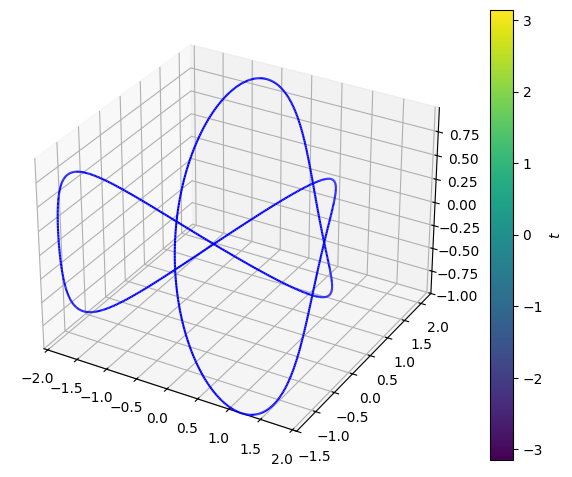

In [19]:
dtuplot.plot3d_parametric_line(
    *knot, (t, -pi, pi), rendering_kw={"color": "blue"}, legend=False
)

In [20]:
## Note -- This integral takes a long time for Sympy to compute. It might easily take more than a minute, so be patient
#integrate(V.subs({x: knot[0], y: knot[1], z: knot[2]}).dot(knot.diff(t)), (t, -pi, pi))

The work which the force field $\pmb{V}$ contributes with as the particle moves a trip around the know is thus $0$.
Just as expected, since $\pmb{V}$ is a gradient vector field.

## Surface Integral of Vector Fields (Flux through Surfaces)

We are given a vector field by:

In [21]:
x, y, z = symbols("x y z", real=True)
V = lambda x, y, z: Matrix([x, y, 2])
V(x, y, z)

⎡x⎤
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣2⎦

We consider the part of the standard paraboloid $F_{parab}$ that is located below the plane $z=1$. This can be parametrized by:

In [22]:
u, v = symbols("u v", real=True)
r = Matrix([u * cos(v), u * sin(v), u**2])
r

⎡u⋅cos(v)⎤
⎢        ⎥
⎢u⋅sin(v)⎥
⎢        ⎥
⎢    2   ⎥
⎣   u    ⎦

where $u\in [0,1]$ and $v\in [-\pi,\pi]$. The vector field and the surface are illustrated:

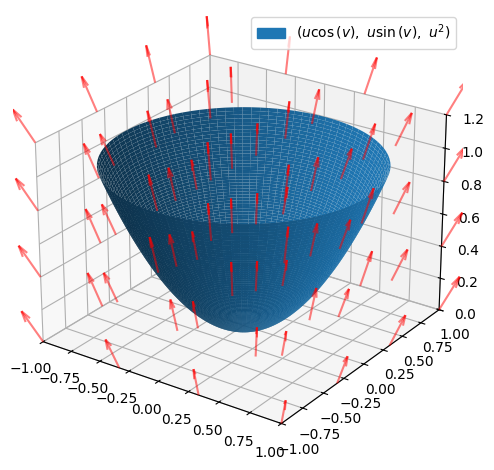

In [23]:
p_parab = dtuplot.plot3d_parametric_surface(
    *r,
    (u, 0, 1),
    (v, -pi, pi),
    use_cm=False,
    camera={"elev": 25, "azim": -55},
    show=False
)
p_field = dtuplot.plot_vector(
    V(x, y, z),
    (x, -1, 1),
    (y, -1, 1),
    (z, 0, 1.2),
    n=4,
    use_cm=False,
    quiver_kw={"alpha": 0.5, "length": 0.1, "color": "red"},
    show=False,
)

(p_parab + p_field).show()

We can do with just plotting the vector field on the surface itself:

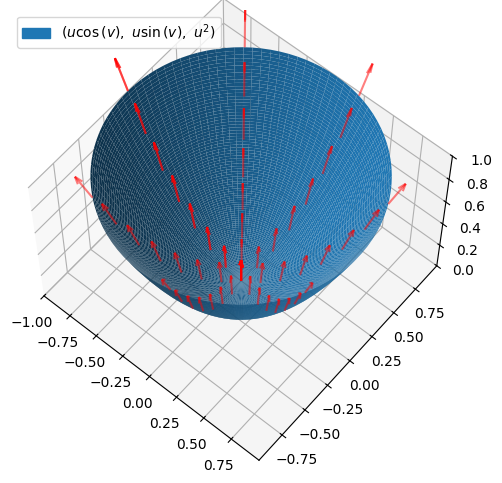

In [24]:
# Vectors arrive from all corners. There are too many
# vectors when "p_parab" is used, so here we reduce n
dummy_surface = dtuplot.plot3d_parametric_surface(
    *r, (u, 0, 1), (v, -pi, pi), n=8, show=False
)
p_field2 = dtuplot.plot_vector(
    V(x, y, z),
    (x, -1, 1),
    (y, -1, 1),
    (z, 0, 1),
    slice=dummy_surface[0],
    use_cm=False,
    quiver_kw={"alpha": 0.5, "length": 0.1, "color": "red"},
    show=False,
)
# Better camera angle for looking at the vectors with
p_parab.camera = {"elev": 60, "azim": -50}

(p_parab + p_field2).show()

### Computation of Flux "down" through the Paraboloid $F_{parab}$

This clearly looks as though there is a (positive) flux up through the surface. We would thus expect to see that the flux down through the surface is negative. We will start by finding the normal vector to the parabloid given by our chosen parametrization:

In [25]:
n_parab = r.diff(u).cross(r.diff(v))
simplify(n_parab)

⎡    2       ⎤
⎢-2⋅u ⋅cos(v)⎥
⎢            ⎥
⎢    2       ⎥
⎢-2⋅u ⋅sin(v)⎥
⎢            ⎥
⎣     u      ⎦

Notice here that the normal vector $n$ is pointing in the "wrong" direction (*inwards towards* the $z$ axis and thus with a postive $z$ coordinate); "wrong" in the sense that we actually wish to find the flux _down_ through the surface. We thus simply have to remember to change the sign of the normal vector $n_{parab}$:

In [26]:
n_parab = -simplify(n_parab)
n_parab

⎡   2       ⎤
⎢2⋅u ⋅cos(v)⎥
⎢           ⎥
⎢   2       ⎥
⎢2⋅u ⋅sin(v)⎥
⎢           ⎥
⎣    -u     ⎦

The length of the normal vector is only needed for arguing that the parametrization is regular:

In [27]:
n_parab.norm().simplify()

This expression is positive on the interior of $\Gamma$, so it is indeed regular. We will now find the integrand:

In [28]:
integrand = n_parab.dot(V(*r))
simplify(integrand)

with which the flux is computed by doing

\begin{equation}
\mathrm{Flux}(\pmb{V}, F_{parab}) = \int_0^1\int_{-\pi}^\pi \pmb{V}(r(u,v))\cdot n_{parab}\,\mathrm{d}u\,\mathrm{d}v
\end{equation}

In [29]:
integrate(integrand, (u, 0, 1), (v, -pi, pi))

The wanted flux is thus $-\pi$!

### Computation of the Flux through the "Lid" $F_{lid}$ of the Paraboloid in the (Positive) Direction of the $z$ axis

In [30]:
r2 = Matrix([u * cos(v), u * sin(v), 1])
n2 = r2.diff(u).cross(r2.diff(v))
simplify(n2)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣u⎦

The direction of the normal vector fits with the wanted direction through the surface $F_{lid}$.

In [31]:
integrand2 = n2.dot(V(*r2))
integrate(integrand2, (u, 0, 1), (v, -pi, pi))

The flux through the lid is $\mathrm{Flux}(\pmb{V},F_{lid}) = 2\pi$.

### The Flux through the closed Surface with Paraboloid and Lid $F_{closed} = F_{parab} \cup F_{lid}$

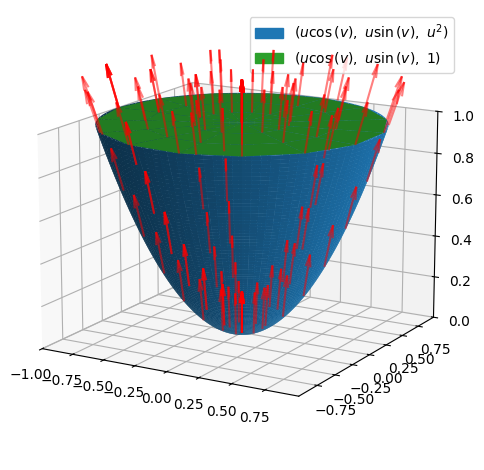

In [32]:
p_lid = dtuplot.plot3d_parametric_surface(
    *r2,
    (u, 0, 1),
    (v, -pi, pi),
    use_cm=False,
    n1=4,
    n2=16,
    camera={"elev": 25, "azim": -55},
    show=False
)
p_fieldlid = dtuplot.plot_vector(
    V(x, y, z),
    (x, -1, 1),
    (y, -1, 1),
    (z, 0, 1),
    slice=p_lid[0],
    use_cm=False,
    quiver_kw={"alpha": 0.5, "length": 0.1, "color": "red"},
    show=False,
)
p_parab.camera = {"elev": 15, "azim": -60}

(p_parab + p_field2 + p_lid + p_fieldlid).show()

We do not need to continue with any further calculations! We here have the flux through all surfaces, from which the total flux through the closed surface is $Flux(\pmb{V},F_{closed})=-\pi+2\pi=\pi$.

## Flux through a Piece of a Spherical Surface

We are given a vector field,

In [33]:
x, y, z = symbols("x y z")
V = Matrix([-y + x, x, z])
V

⎡x - y⎤
⎢     ⎥
⎢  x  ⎥
⎢     ⎥
⎣  z  ⎦

and a section of a spherical surface,

In [34]:
u, v, w = symbols("u v w", real=True)
radius = 2
r = radius * Matrix([sin(u) * cos(v), sin(u) * sin(v), cos(u)])
r

⎡2⋅sin(u)⋅cos(v)⎤
⎢               ⎥
⎢2⋅sin(u)⋅sin(v)⎥
⎢               ⎥
⎣   2⋅cos(u)    ⎦

with $u\in[\pi/6,\pi/2]$ and $v\in[0,\pi]$,

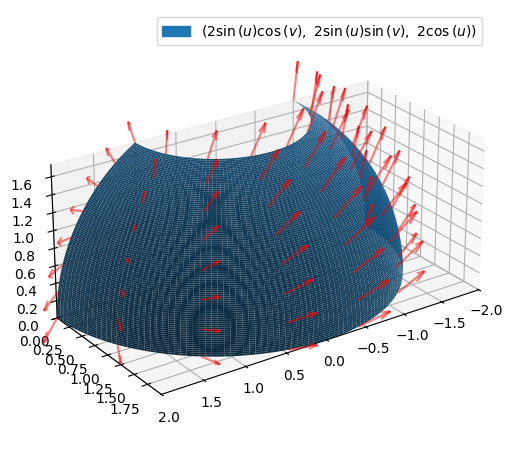

In [35]:
p_surface = dtuplot.plot3d_spherical(
    radius,
    (u, pi / 6, pi / 2),
    (v, 0, pi),
    aspect="equal",
    camera={"elev": 25, "azim": 55},
    show=False,
)
dummy_surface = dtuplot.plot3d_spherical(
    radius, (u, pi / 6, pi / 2), (v, 0, pi), show=False, n=8
)
p_field = dtuplot.plot_vector(
    V,
    (x, -1, 1),
    (y, -1, 1),
    (z, 0, 1),
    slice=dummy_surface[0],
    use_cm=False,
    quiver_kw={"alpha": 0.5, "length": 0.2, "color": "red"},
    show=False,
)

(p_surface + p_field).show()

The flux is computed to be

In [36]:
n = r.diff(u).cross(r.diff(v))
integrand = n.dot(V.subs({x: r[0], y: r[1], z: r[2]}))
integrate(integrand, (u, pi / 6, pi / 2), (v, 0, pi))

## Flux through a Section of a spherical surface using Gauss' Divergence Theorem (not Syllabus)

We will compare the result from the flux computation with a result from using Gauss' Theorem through a semi-sphere with a radius $a$ ($u\in[0,a]$, $v\in[0,\pi/2]$, and $w\in[-\pi,\pi]$), with the flux through its two surfaces. This should give the same result!

In [37]:
V = Matrix([8 * x, 8, 4 * z**3])
r = u * Matrix([sin(v) * cos(w), sin(v) * sin(w), cos(v)])
V, r

⎛⎡8⋅x ⎤                   ⎞
⎜⎢    ⎥  ⎡u⋅sin(v)⋅cos(w)⎤⎟
⎜⎢ 8  ⎥  ⎢               ⎥⎟
⎜⎢    ⎥, ⎢u⋅sin(v)⋅sin(w)⎥⎟
⎜⎢   3⎥  ⎢               ⎥⎟
⎝⎣4⋅z ⎦  ⎣   u⋅cos(v)    ⎦⎠

First, using Gauss' Theorem,

In [38]:
a = symbols("a", real=True, positive=True)
M = Matrix.hstack(r.diff(u), r.diff(v), r.diff(w))
# the determinatn is positive. The only term that is not
# squared is sin(v), which is positive within v's limits
jacobian = M.det()
divV = dtutools.div(V, [x, y, z])
divV_r = divV.subs({x: r[0], y: r[1], z: r[2]})
integrate(divV_r * jacobian, (u, 0, a), (v, 0, pi / 2), (w, -pi, pi))

and then through the two surfaces,

In [39]:
# The first surface corresponds to fixing u as the radius
r1 = r.subs(u, a)
n1 = r1.diff(v).cross(r1.diff(w))  # we have checked that it points outwards
integrand1 = n1.dot(V.subs({x: r1[0], y: r1[1], z: r1[2]}))
flux1 = integrate(integrand1, (v, 0, pi / 2), (w, -pi, pi))
# Second surface corresponds to fixing v to pi/2
# The remaining becomes the disc with radius a
r2 = r.subs(v, pi / 2)
n2 = -r2.diff(u).cross(r2.diff(w))  # must be negative in order to point outwards
integrand2 = n2.dot(V.subs({x: r2[0], y: r2[1], z: r2[2]}))
flux2 = integrate(integrand2, (u, 0, a), (w, -pi, pi))
flux1 + flux2

As expected!

## Flow Curves / Integral Curves

Vector fields can also "determine" a particle's motion in the plane or in 3D space (a flow curve). We image that we at time $t=0$ throw a particle into a force field at the point $\pmb{x}_0$, and we wish to model the particle's trajectory (curve) $\pmb{r}(t)$ as a function of time. These curves are called *integral curves* (and sometimes flow curves). They are solutions to the differential equation system:

\begin{equation*}
  \pmb{r}'(t) = \pmb V(\pmb{r}(t)), \quad \pmb{r}(0) = \pmb{x}_0
\end{equation*}

where $\pmb{x}_0$ is the initial point.

We consider the vector field

\begin{equation*}
  \pmb{V}(x,y) = \left[\begin{matrix}-\frac{1}{4}x + \frac{1}{2}y\\\frac{1}{2}x + \frac{1}{4}y\end{matrix}\right],
\end{equation*}

and two points that indicate the starting points $s_1$ and $s_2$ of two particles within a vector field $V$

\begin{equation*}
  s_1 = (5, 0),\quad s_2 = (-3, \frac{1}{2}).
\end{equation*}

In [40]:
s1, s2 = Matrix([5, 0]), Matrix([-3, S(1)/2])

Can we now find the flow curves of these two particles? We denote them, respectively, $r_1$ and $r_2$.

In this case the differential equation system is linear, so we know from the solution model from Mathematics 1a. We will first find the system matrix:

\begin{equation*}
   A = \left[\begin{matrix}-\frac{1}{4} & \frac{1}{2}\\\frac{1}{2} & \frac{1}{4}\end{matrix}\right]
\end{equation*}

and we can use the eigenvalues and corresponding eigenvectors of $A$ to determine the flow curves

In [41]:
A = Matrix(2, 2, [S("-1/4"), S("1/2"), S("1/2"), S("1/4")])
A.eigenvects(), A.diagonalize()

⎛                                                  ⎛                      ⎡-√5 ↪
⎜⎡⎛         ⎡⎡  √5   1⎤⎤⎞  ⎛       ⎡⎡  1   √5⎤⎤⎞⎤  ⎜⎡  √5   1    1   √5⎤  ⎢─── ↪
⎜⎢⎜-√5      ⎢⎢- ── - ─⎥⎥⎟  ⎜√5     ⎢⎢- ─ + ──⎥⎥⎟⎥  ⎜⎢- ── - ─  - ─ + ──⎥  ⎢ 4  ↪
⎜⎢⎜────, 1, ⎢⎢  2    2⎥⎥⎟, ⎜──, 1, ⎢⎢  2   2 ⎥⎥⎟⎥, ⎜⎢  2    2    2   2 ⎥, ⎢    ↪
⎜⎢⎜ 4       ⎢⎢        ⎥⎥⎟  ⎜4      ⎢⎢        ⎥⎥⎟⎥  ⎜⎢                  ⎥  ⎢    ↪
⎜⎣⎝         ⎣⎣   1    ⎦⎦⎠  ⎝       ⎣⎣   1    ⎦⎦⎠⎦  ⎜⎣   1         1    ⎦  ⎢ 0  ↪
⎝                                                  ⎝                      ⎣    ↪

↪      ⎤⎞⎞
↪ ─  0 ⎥⎟⎟
↪      ⎥⎟⎟
↪      ⎥⎟⎟
↪    √5⎥⎟⎟
↪    ──⎥⎟⎟
↪    4 ⎦⎠⎠

Both `A.eigenvects()` and `A.diagonalize()` provide the wanted info, and which one uses is just a question of preference.

### With `A.eigenvects()`:

In [42]:
k = symbols("k1:3")
ev = A.eigenvects()
ev

⎡⎛         ⎡⎡  √5   1⎤⎤⎞  ⎛       ⎡⎡  1   √5⎤⎤⎞⎤
⎢⎜-√5      ⎢⎢- ── - ─⎥⎥⎟  ⎜√5     ⎢⎢- ─ + ──⎥⎥⎟⎥
⎢⎜────, 1, ⎢⎢  2    2⎥⎥⎟, ⎜──, 1, ⎢⎢  2   2 ⎥⎥⎟⎥
⎢⎜ 4       ⎢⎢        ⎥⎥⎟  ⎜4      ⎢⎢        ⎥⎥⎟⎥
⎣⎝         ⎣⎣   1    ⎦⎦⎠  ⎝       ⎣⎣   1    ⎦⎦⎠⎦

The general solution is set up as we know it from system of first-order differential equations (with two different eigenvalues):

\begin{equation*}
  \boldsymbol r(u) = k_1 \mathrm e^{{\lambda_1}u} \boldsymbol v_1 + k_2 \mathrm e^{{\lambda_2}u} \boldsymbol v_2
\end{equation*}

In [43]:
r_general = (
    k[0] * exp(ev[0][0] * u) * ev[0][-1][0] + k[1] * exp(ev[1][0] * u) * ev[1][-1][0]
)
r_general

⎡               -√5⋅u                   √5⋅u⎤
⎢               ──────                  ────⎥
⎢   ⎛  √5   1⎞    4         ⎛  1   √5⎞   4  ⎥
⎢k₁⋅⎜- ── - ─⎟⋅ℯ       + k₂⋅⎜- ─ + ──⎟⋅ℯ    ⎥
⎢   ⎝  2    2⎠              ⎝  2   2 ⎠      ⎥
⎢                                           ⎥
⎢               -√5⋅u        √5⋅u           ⎥
⎢               ──────       ────           ⎥
⎢                 4           4             ⎥
⎣           k₁⋅ℯ       + k₂⋅ℯ               ⎦

The given starting points are our initial conditions, and the equations

\begin{equation*}
  \boldsymbol r_1(0) = s_1\quad \text{and}\quad \boldsymbol r_1(0) = s_2
\end{equation*}

are solved in order to find our specific flow curves

In [44]:
ks_r1 = solve(r_general.subs(u, 0) - s1)
ks_r2 = solve(r_general.subs(u, 0) - s2)
ks_r1, ks_r2

These can be substituted directly into $\boldsymbol r(u)$

In [45]:
r1 = r_general.subs(ks_r1)
r2 = r_general.subs(ks_r2)

and we arrive at the flow curves

In [46]:
r1, r2

⎛⎡               √5⋅u                  -√5⋅u ⎤  ⎡                        √5⋅u  ↪
⎜⎢               ────                  ──────⎥  ⎢                        ────  ↪
⎜⎢   ⎛  1   √5⎞   4        ⎛  √5   1⎞    4   ⎥  ⎢⎛  1   √5⎞ ⎛1   11⋅√5⎞   4    ↪
⎜⎢√5⋅⎜- ─ + ──⎟⋅ℯ     - √5⋅⎜- ── - ─⎟⋅ℯ      ⎥  ⎢⎜- ─ + ──⎟⋅⎜─ - ─────⎟⋅ℯ      ↪
⎜⎢   ⎝  2   2 ⎠            ⎝  2    2⎠        ⎥  ⎢⎝  2   2 ⎠ ⎝4    20  ⎠        ↪
⎜⎢                                           ⎥, ⎢                              ↪
⎜⎢               √5⋅u       -√5⋅u            ⎥  ⎢                        √5⋅u  ↪
⎜⎢               ────       ──────           ⎥  ⎢                        ────  ↪
⎜⎢                4           4              ⎥  ⎢           ⎛1   11⋅√5⎞   4    ↪
⎜⎣           √5⋅ℯ     - √5⋅ℯ                 ⎦  ⎢           ⎜─ - ─────⎟⋅ℯ      ↪
⎝                                               ⎣           ⎝4    20  ⎠        ↪

↪                           -√5⋅u ⎤⎞
↪                           ──────⎥⎟
↪   ⎛1   11⋅√5⎞ ⎛  √5   1⎞    4   

No ranges were provided. This function will attempt to find them, however the order will be arbitrary, which means the visualization might be flipped.

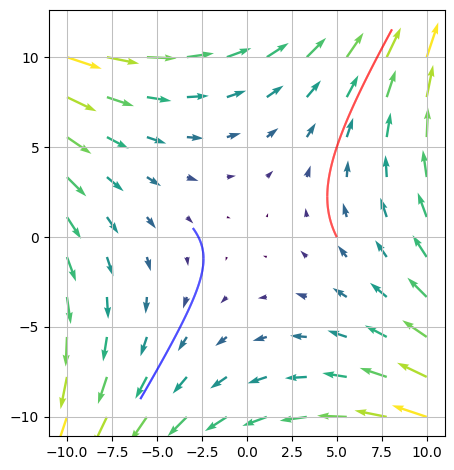

In [47]:
v_field = dtuplot.plot_vector(
    A * Matrix([x, y]),
    n=10,
    scalar=False,
    colorbar=False,
    quiver_kw={"color": "black"},
    show=False,
)
r1_plot = dtuplot.plot_parametric(
    *r1, [u, 0, 3], rendering_kw={"color": "red"}, colorbar=False, show=False
)
r2_plot = dtuplot.plot_parametric(
    *r2, (u, 0, 4), rendering_kw={"color": "blue"}, colorbar=False, show=False
)
(v_field + r1_plot + r2_plot).show()

### Solution via `A.diagonalize()`:

In [48]:
k = symbols("k1:3")
matrix_of_evs, LAMBDA = A.diagonalize()
matrix_of_evs, LAMBDA

⎛                      ⎡-√5     ⎤⎞
⎜⎡  √5   1    1   √5⎤  ⎢────  0 ⎥⎟
⎜⎢- ── - ─  - ─ + ──⎥  ⎢ 4      ⎥⎟
⎜⎢  2    2    2   2 ⎥, ⎢        ⎥⎟
⎜⎢                  ⎥  ⎢      √5⎥⎟
⎜⎣   1         1    ⎦  ⎢ 0    ──⎥⎟
⎝                      ⎣      4 ⎦⎠

In [49]:
r_general = k[0] * exp(LAMBDA[0, 0] * u) * matrix_of_evs.col(0) + k[1] * exp(
    LAMBDA[1, 1] * u
) * matrix_of_evs.col(1)
r_general

⎡               -√5⋅u                   √5⋅u⎤
⎢               ──────                  ────⎥
⎢   ⎛  √5   1⎞    4         ⎛  1   √5⎞   4  ⎥
⎢k₁⋅⎜- ── - ─⎟⋅ℯ       + k₂⋅⎜- ─ + ──⎟⋅ℯ    ⎥
⎢   ⎝  2    2⎠              ⎝  2   2 ⎠      ⎥
⎢                                           ⎥
⎢               -√5⋅u        √5⋅u           ⎥
⎢               ──────       ────           ⎥
⎢                 4           4             ⎥
⎣           k₁⋅ℯ       + k₂⋅ℯ               ⎦

In [50]:
eq_k_r1 = Eq
ks_r1 = solve(r_general.subs(u, 0) - s1)
ks_r2 = solve(r_general.subs(u, 0) - s2)
ks_r1, ks_r2

and we have the same flow curves as above

In [51]:
r1 = r_general.subs(ks_r1)
r2 = r_general.subs(ks_r2)
r1, r2

⎛⎡               √5⋅u                  -√5⋅u ⎤  ⎡                        √5⋅u  ↪
⎜⎢               ────                  ──────⎥  ⎢                        ────  ↪
⎜⎢   ⎛  1   √5⎞   4        ⎛  √5   1⎞    4   ⎥  ⎢⎛  1   √5⎞ ⎛1   11⋅√5⎞   4    ↪
⎜⎢√5⋅⎜- ─ + ──⎟⋅ℯ     - √5⋅⎜- ── - ─⎟⋅ℯ      ⎥  ⎢⎜- ─ + ──⎟⋅⎜─ - ─────⎟⋅ℯ      ↪
⎜⎢   ⎝  2   2 ⎠            ⎝  2    2⎠        ⎥  ⎢⎝  2   2 ⎠ ⎝4    20  ⎠        ↪
⎜⎢                                           ⎥, ⎢                              ↪
⎜⎢               √5⋅u       -√5⋅u            ⎥  ⎢                        √5⋅u  ↪
⎜⎢               ────       ──────           ⎥  ⎢                        ────  ↪
⎜⎢                4           4              ⎥  ⎢           ⎛1   11⋅√5⎞   4    ↪
⎜⎣           √5⋅ℯ     - √5⋅ℯ                 ⎦  ⎢           ⎜─ - ─────⎟⋅ℯ      ↪
⎝                                               ⎣           ⎝4    20  ⎠        ↪

↪                           -√5⋅u ⎤⎞
↪                           ──────⎥⎟
↪   ⎛1   11⋅√5⎞ ⎛  √5   1⎞    4   

## An Example with the Gauss Theorem (not Syllabus)

We are given the vector field

In [52]:
V = Matrix([-x + cos(z), -y * x, 3 * z + exp(y)])
V

⎡-x + cos(z)⎤
⎢           ⎥
⎢   -x⋅y    ⎥
⎢           ⎥
⎢        y  ⎥
⎣ 3⋅z + ℯ   ⎦

as well as the spatial set $\Omega$ given by 
\begin{equation*}
\bigl\{(x,y,z) \in \mathbb{R}^3 : x\in[0,3], \, y\in[0,2], \,z\in[0,y^2] \bigr\}
\end{equation*} 
Here the set is illustrated:

In [53]:
a = symbols("a")
# Since one cannot plot a 3D volumen (not easily, that is), we will plot its surfaces,
p = dtuplot.plot3d_parametric_surface(
    x,
    y,
    y**2,
    (x, 0, 3),
    (y, 0, 2),
    {"color": "royalblue"},
    use_cm=False,
    aspect="equal",
    show=False,
)
p.extend(
    dtuplot.plot3d_parametric_surface(
        0,
        y,
        a * y**2,
        (a, 0, 1),
        (y, 0, 2),
        {"color": "royalblue", "alpha": 0.5},
        use_cm=False,
        aspect="equal",
        show=False,
    )
)
p.extend(
    dtuplot.plot3d_parametric_surface(
        3,
        y,
        a * y**2,
        (a, 0, 1),
        (y, 0, 2),
        {"color": "royalblue", "alpha": 0.5},
        use_cm=False,
        aspect="equal",
        show=False,
    )
)
p.extend(
    dtuplot.plot3d_parametric_surface(
        x,
        2,
        a * 4,
        (x, 0, 3),
        (a, 0, 1),
        {"color": "royalblue", "alpha": 0.5},
        use_cm=False,
        aspect="equal",
        show=False,
    )
)
p.extend(
    dtuplot.plot3d_parametric_surface(
        x,
        y,
        0,
        (x, 0, 3),
        (y, 0, 2),
        {"color": "royalblue", "alpha": 0.5},
        use_cm=False,
        aspect="equal",
        show=False,
    )
)
p_field = dtuplot.plot_vector(
    V,
    (x, 0, 3),
    (y, 0, 2),
    (z, 0, 4),
    n=4,
    use_cm=False,
    quiver_kw={"alpha": 0.5, "length": 0.05, "color": "red"},
    show=False,
)

(p + p_field).show()

We will now determine the flux of the vector field $\pmb{V}$ out through the closed surface of $\Omega$ by use of Gauss' Theorem!

We will first determine a parametric representation of the solid volume,

In [ ]:
u, v, w = symbols("u v w")
r = Matrix([u, v, w * v**2])
r

In [ ]:
M = Matrix.hstack(r.diff(u), r.diff(v), r.diff(w))
M, det(M)

We can compute the determinant since
\begin{equation*}
(r_u'(u,v,w)\times r_v'(u,v,w))\cdot r_w'(u,v,w)=\det\begin{bmatrix}|&|&|\\r_u'(u,v,w)&r_v'(u,v,w)&r_w'(u,v,w)\\|&|&|\end{bmatrix}.
\end{equation*}

We must, though, not forget the absolute value (see Definition 25.19). It might, though, often be possible to achieve a nicer-looking expression by not computing the absolute value if one can garantee that the determinant is always positive. That is the case here, since $v>0$, so

In [ ]:
jacobian = M.det()
jacobian

The divergence now becomes

In [ ]:
divV = dtutools.div(V, (x, y, z))
divV

The divergence boudned to the parametrized region is thus found to be,

In [ ]:
divV_r = divV.subs({x: r[0], y: r[1], z: r[2]})
divV_r

Since

In [ ]:
integrate(divV_r * jacobian, (u, 0, 3), (v, 0, 2), (w, 0, 1))

we get from Gauss' Theorem that:

\begin{equation}
\int_{\delta\Omega}\pmb{V}\cdot \mathrm{d}\pmb{S} = \int_0^1\int_0^2\int_0^3(2-u)\cdot v^2\,\mathrm{d}u\,\mathrm{d}v\,\mathrm{d}w = 4
\end{equation}

In this example it was particularly obvious to use Gauss' Theorem, both since we would avoid computing the flux through $5$ surfaces, after which we would add up those partial results, and since the divergence is mathematically simple in comparison to its vector field. This must, though, be considered every time a new exercise is given!